![blendify_logo_light_bg.png](https://virtualhumans.mpi-inf.mpg.de/blendify/_images/blendify_logo_light_bg.png)
# Welcome to Blendify Collab demo notebook!
### For faster performance, make sure to change runtime to GPU



In [1]:
# Install blendify
!pip install blendify trimesh matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 682.3/682.3 kB 28.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 350.1/350.1 MB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 52.9 MB/s eta 0:00:00


# In this demo, let's draw a vertex-colored mesh

Info: No orphaned data-blocks to purge


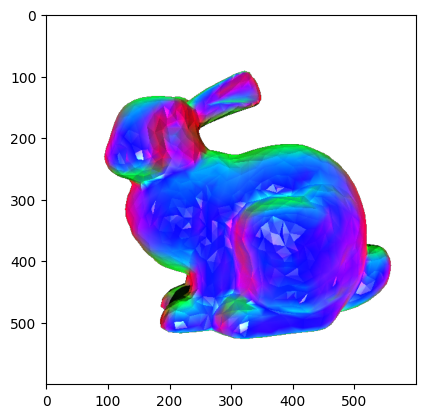

In [2]:
import requests, trimesh, io
import numpy as np
import matplotlib.pyplot as plt

from blendify import scene
from blendify.colors import UniformColors, VertexColors
from blendify.materials import PrincipledBSDFMaterial

#Load object
bunny_data = requests.get("https://graphics.stanford.edu/~mdfisher/Data/Meshes/bunny.obj", stream=True).raw
bunny_data.decode_content = True
bunny = trimesh.load(bunny_data, file_type="obj")

# Create metallic material
material = PrincipledBSDFMaterial(metallic=0.3)

# Create per-vertex colors
colors = VertexColors(np.abs(bunny.vertex_normals))

# Add mesh
scene.renderables.add_mesh(vertices=bunny.vertices*100, faces=bunny.faces, material=material, colors=colors)

# Set the camera
scene.set_perspective_camera((600,600), fov_y=np.pi/3, translation=(-3,10,20))

# Create light
scene.lights.add_sun()

# Render
img = scene.render()

#Show
plt.imshow(img)